# Supply Chain Management

## OVERVIEW

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a <b><u>mismatch in the demand and supply.</u></b> Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

Create a model using : [Train dataset](https://drive.google.com/file/d/1eodz3D2p9HZYKzEJYBpyuDGek-BH0dbY/view)

## GOALS
The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

# Exploratory Data Analysis

##### Explore the Data


In [1]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split



In [2]:
# # One way if we need to mount the google drive programatically
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entri/Internship/supply_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entri/Internship/supply_test.csv')

In [4]:
print(df.shape)
print(df_test.shape)

(16620, 25)
(5529, 25)


In [5]:
train_columns = df.columns
test_columns = df_test.columns

In [6]:
train_columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [7]:
test_columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:
set(test_columns) - set(train_columns)

set()

In [9]:
set(train_columns) - set(test_columns)

set()

Thankfully columns in train and test data set are similar

In [10]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


Delete the index column

In [11]:
# First column is dummy index, so let's remove it
df.drop(df.columns[0],axis=1, inplace = True)
df_test.drop(df_test.columns[0],axis=1, inplace = True)

In [12]:
print(df.shape)
print(df_test.shape)

(16620, 24)
(5529, 24)


In [13]:
df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [14]:
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [15]:
# what the dataset have to say?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [16]:
# Descriptive statistics for numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.0,3.0,4.0,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.0,4856.0,5500.0,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.0,42.0,56.0,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.0,0.0,0.0,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.0,0.0,0.0,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.0,1.0,1.0,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.0,164.0,218.0,271.0
workers_num,15953.0,28.911490,7.842046,10.0,24.0,28.0,33.0,98.0


<ipython-input-17-15dcee11be2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('product_wg_ton',axis=1).corrwith(df['product_wg_ton']).plot(kind='bar')


<Axes: >

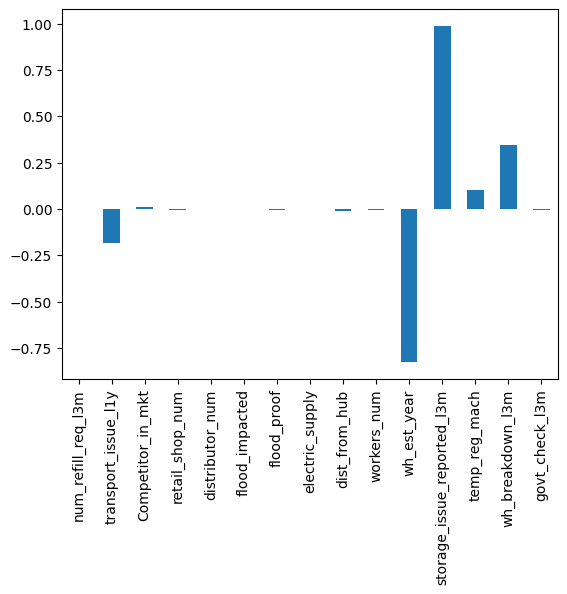

In [17]:
df.drop('product_wg_ton',axis=1).corrwith(df['product_wg_ton']).plot(kind='bar')
# df['product_wg_ton']


In [18]:
print(df.duplicated().sum())
df.duplicated()

0


0        False
1        False
2        False
3        False
4        False
         ...  
16615    False
16616    False
16617    False
16618    False
16619    False
Length: 16620, dtype: bool

In [19]:
df['wh_owner_type'].unique()

array(['Rented', 'Company Owned'], dtype=object)

<Axes: >

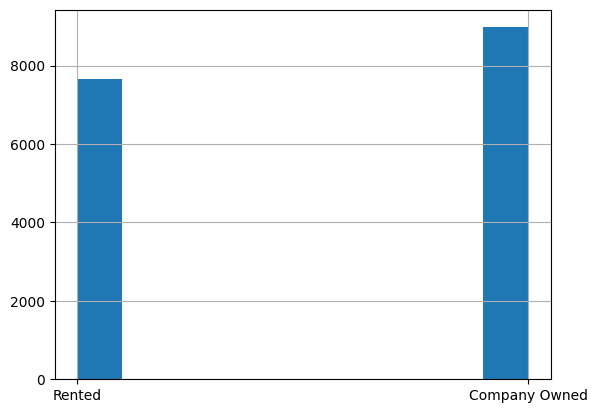

In [20]:
df['wh_owner_type'].hist()

In [21]:
df['flood_impacted'].unique()

array([0, 1])

In [22]:
df['flood_proof'].unique()

array([1, 0])

In [23]:
df['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [24]:
df.size

398880

In [25]:
df_test.size

132696

In [26]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [27]:
df_test.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [28]:
df['Ware_house_ID']

0        WH_100000
1        WH_100001
2        WH_100002
3        WH_100003
4        WH_100004
           ...    
16615    WH_116615
16616    WH_116616
16617    WH_116617
16618    WH_116618
16619    WH_116619
Name: Ware_house_ID, Length: 16620, dtype: object

### Drop unwanted columns

In [29]:
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)
df_test = df_test.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

##### Handle Null Data

(array([ 698., 1040., 1034.,  673., 1005.,  980.,  688., 1011.,  992.,
         639.]),
 array([1996. , 1998.7, 2001.4, 2004.1, 2006.8, 2009.5, 2012.2, 2014.9,
        2017.6, 2020.3, 2023. ]),
 <BarContainer object of 10 artists>)

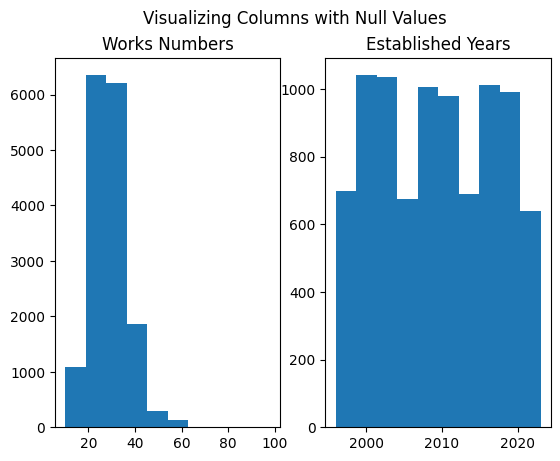

In [30]:
# Null columns are
# workers_num                      667
# wh_est_year                     7860
# approved_wh_govt_certificate     599


# Plot the columns with null values
fig, (ax1,ax2) = plt.subplots(1,2)

fig.suptitle("Visualizing Columns with Null Values")

ax1.set_title('Works Numbers')
ax1.hist(df['workers_num'])

ax2.set_title("Established Years")
ax2.hist(df['wh_est_year'])


# Plot the workers histogram
# df['workers_num'].hist()

<Axes: >

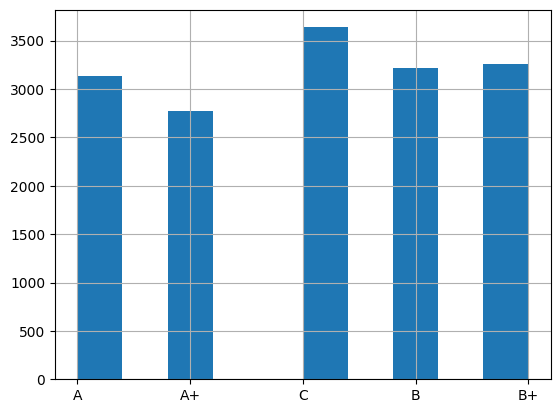

In [31]:
df['approved_wh_govt_certificate'].hist()

Is any of these columns have any linear relationship with the product weight?


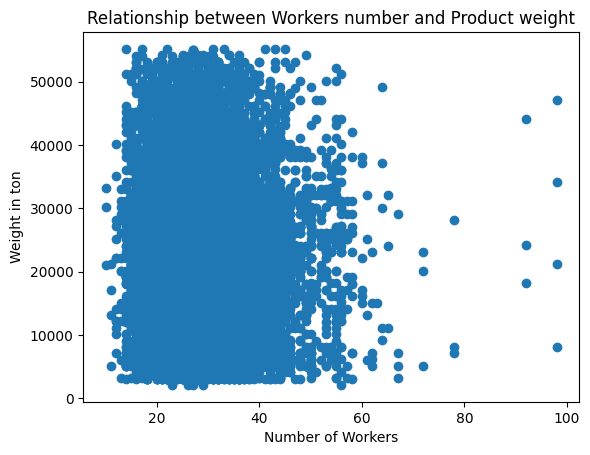

In [32]:
plt.title('Relationship between Workers number and Product weight')
plt.scatter(df['workers_num'],df['product_wg_ton'])
plt.xlabel('Number of Workers')
plt.ylabel('Weight in ton')
plt.show()

Its very clear that there is no relationship between number of workers and weight stored in a warehouse.

This indicates we can fill the null value with mean or median.

I choose median

In [33]:
df['workers_num']  = df['workers_num'].fillna(df['workers_num'].median())
df_test['workers_num']  = df_test['workers_num'].fillna(df['workers_num'].median())

df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [34]:
df_test.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Is there any relationship between established year and the weight of product stored

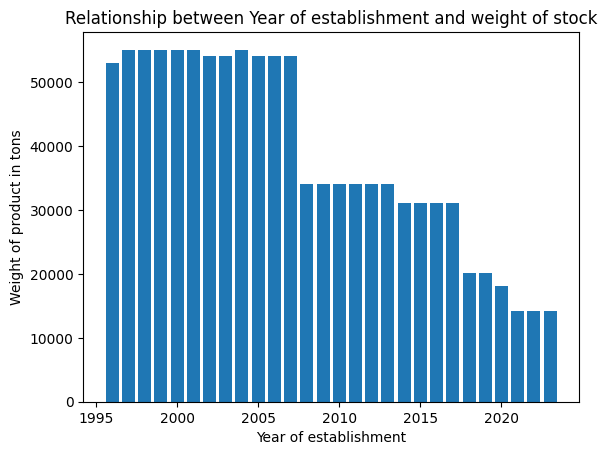

In [35]:
plt.title("Relationship between Year of establishment and weight of stock")

plt.bar(df['wh_est_year'],df['product_wg_ton'])

plt.xlabel("Year of establishment")
plt.ylabel("Weight of product in tons")

plt.show()

We found a clear co-relation between the establishd year and weight of goods stored in each warehouse. We found this pattern even while we only have less than half of the established year.



Two ways to deal with this column
1. Drop the column - as half of the data is missing
2. Fill the column by finding appropriate values by finding the corelation

First we can look how the model will perform if the column is droped

```
It is facinating to know older warehouse equipy larger weight of products and vice versa
```

<ipython-input-36-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

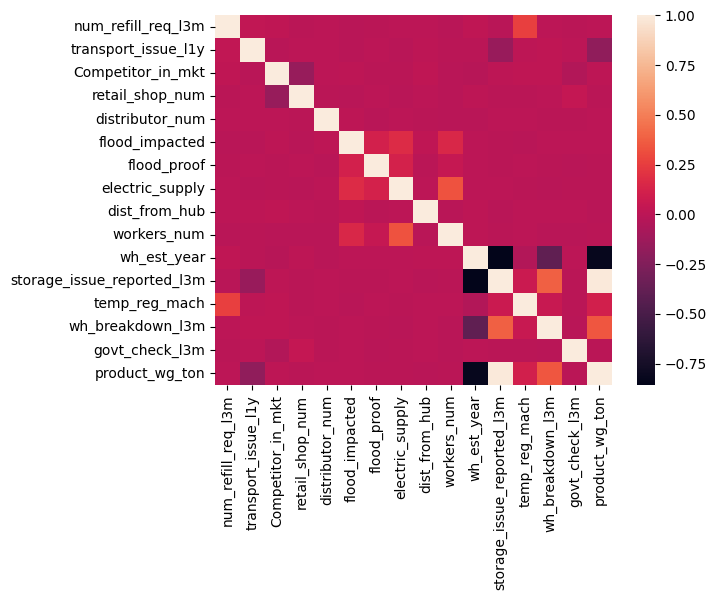

In [36]:
sns.heatmap(df.corr())

In [37]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,0.019149,-0.005090,0.001944,-0.015214,-0.006015,0.001104,-0.000909,-0.013827,0.017310,-0.008875,0.256853,0.000249,-0.008354,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.010148,0.000400,0.002275,-0.009324,0.002377,-0.008770,0.009382,-0.006779,-0.002787,-0.152709,0.009052,0.014092,0.001738,-0.183150
Competitor_in_mkt,0.019149,-0.010148,1.000000,-0.155607,0.004282,0.012223,-0.004563,-0.008485,0.014434,-0.013648,-0.019490,0.011957,0.016640,0.014849,-0.040299,0.010854
retail_shop_num,-0.005090,0.000400,-0.155607,1.000000,-0.005892,-0.010186,0.001207,-0.008503,-0.000910,-0.009968,0.007506,-0.008094,-0.002687,0.000558,0.038614,-0.008332
distributor_num,0.001944,0.002275,0.004282,-0.005892,1.000000,0.008627,-0.009270,0.001878,-0.005771,-0.009437,-0.015609,-0.000539,0.003390,-0.003420,-0.003020,0.001435
flood_impacted,-0.015214,-0.009324,0.012223,-0.010186,0.008627,1.000000,0.114835,0.168812,0.013265,0.148482,0.001767,-0.001571,-0.010540,0.000643,0.000730,-0.000507
flood_proof,-0.006015,0.002377,-0.004563,0.001207,-0.009270,0.114835,1.000000,0.118690,-0.003997,0.044652,0.000187,-0.004752,0.005102,-0.004836,-0.009568,-0.003862
electric_supply,0.001104,-0.008770,-0.008485,-0.008503,0.001878,0.168812,0.118690,1.000000,-0.000506,0.331202,0.001691,-0.000652,-0.003375,-0.015071,-0.005347,-0.001533
dist_from_hub,-0.000909,0.009382,0.014434,-0.000910,-0.005771,0.013265,-0.003997,-0.000506,1.000000,-0.013023,0.011998,-0.011496,0.002281,0.002410,0.003403,-0.011380
workers_num,-0.013827,-0.006779,-0.013648,-0.009968,-0.009437,0.148482,0.044652,0.331202,-0.013023,1.000000,0.010320,-0.005700,0.002896,-0.012389,-0.009073,-0.005446


In [38]:
# Drop the established year column as half is empty
df = df.drop(['wh_est_year'],axis=1)
df_test = df_test.drop(['wh_est_year'],axis=1)


In [39]:
# Two columns that have null values is managed

df.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    599
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [40]:
df_test.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    206
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

<Axes: >

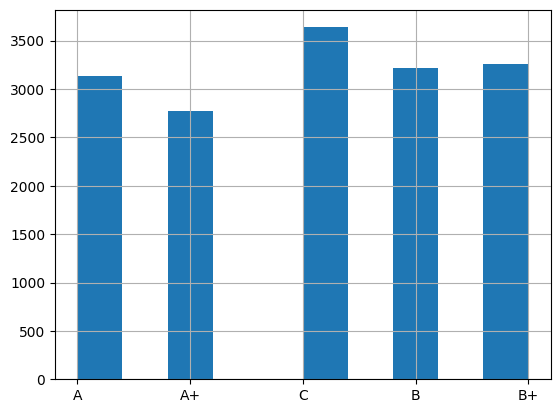

In [41]:
# Deal the column approved_wh_govt_certificate

df['approved_wh_govt_certificate'].hist()

[Text(0.5, 1.0, 'Location Type by zone')]

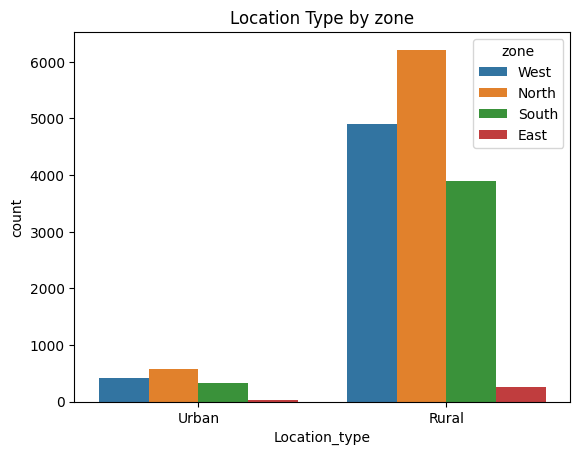

In [42]:
# Location type by zone
sns.countplot(data=df,x='Location_type',hue='zone').set(title="Location Type by zone")

In [43]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(method='ffill')
df_test['approved_wh_govt_certificate'] = df_test['approved_wh_govt_certificate'].fillna(method='ffill')

<Axes: >

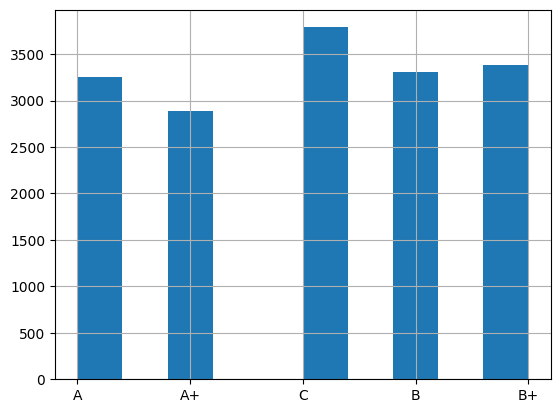

In [44]:
df['approved_wh_govt_certificate'].hist()

In [45]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [46]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

#### Data Preprocessing

##### Label Encoding

In [47]:
df.dtypes

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [48]:
# Label Encoding for columns where the type is object

# Load necessary Libraries and classes
from sklearn.preprocessing import LabelEncoder

# Loop through columns and encode
for col in df.select_dtypes(include=['object']):
    # df.select_dtypes(include=['object']) will select all columns which the data type is a object, string is considered as a object here
    le = LabelEncoder()
    # This will replace the existing column with newly created encoded values
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

# check whether the encoding is successful
df.head()


,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,18,0,4,6,24,24071


In [49]:
df.dtypes

Location_type                     int64
WH_capacity_size                  int64
zone                              int64
WH_regional_zone                  int64
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                     int64
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate      int64
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

##### Split the data

In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=101, test_size=0.3)

In [51]:
df.shape

(16620, 21)

In [52]:
X.shape

(16620, 20)

In [53]:
y.shape

(16620,)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11634, 20)
(4986, 20)
(11634,)
(4986,)


# Model Selection

We need to create the best model that effeciantly predict the correct weight in ton for each warehouse. so we need to experiment as many models as possible

Some models we are using and respective evaluation used in this work are listed in following table

| Model | Why | Evaluation Used |
|-------|-----|-----------------|
|DecisionTreeClassifier|--|TBD|
||||


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import PassiveAggressiveClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import CategoricalNB
# from sklearn.naive_bayes import ComplementNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import LinearSVC
# from sklearn.svm import NuSVC
# from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_squared_error, f1_score, r2_score, precision_score, confusion_matrix



Create a function to fit, train, test and evluate the given model with the given dataset

In [56]:
def train_model(model):
  try:
    # Fit the model to the dataset
    print(f"Training the model: {model}")
    model.fit(X_train, y_train)

    # test the model
    y_pred = model.predict(X_test)

    # Evaluate the models
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=True)
    r2 = r2_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, pos_label='positive', average='micro')
    cm = confusion_matrix(y_test, y_pred)

    return {
        "Model" : model,
        "RMSE" : rmse,
        "MSE" : mse,
        "R2" : r2,
        "F1" : f1,
        "Precision Score" : precision,
        "Confusion Matrix" : cm,
    }

  except Exception as e:
    print(f"    An Error Occured on training the model {model} \n    Error: {e}")
    return {"Model":model}

In [57]:
models = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    # QuadraticDiscriminantAnalysis(),

    # ExtraTreesClassifier(),
    # GradientBoostingClassifier(),
    # HistGradientBoostingClassifier(),
    # RandomForestClassifier(),
    # LogisticRegression(),
    # PassiveAggressiveClassifier(),
    # Perceptron(),
    # SGDClassifier(),
    # BernoulliNB(),
    # CategoricalNB(),
    # ComplementNB(),
    # GaussianNB(),
    # MultinomialNB(),
    # KNeighborsClassifier(),
    # MLPClassifier(),
    # LinearSVC(),
    # NuSVC(),
    # SVC(),
]

In [58]:
# Create an empty DataFrame to store results
results = pd.DataFrame(columns=["Model", "MSE", "RMSE", "R2", "F1", "Precision Score", "Confusion Matrix"])  # Add desired metrics

# Loop over all the selected models
for model in models:
  res = train_model(model)

  #Convert the evaluation metrics dict to pd.Series then to pd.DataFrame using to_frame() method and Transpose it
  row = pd.Series(res).to_frame().T
  results = pd.concat([results, row], axis=0)

  # results = results.append(res, ignore_index=True)

results


Training the model: DecisionTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Training the model: ExtraTreeClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


,Model,MSE,RMSE,R2,F1,Precision Score,Confusion Matrix
0,DecisionTreeClassifier(),3174349.315283,3174349.315283,0.97668,0.004011,0.004011,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
0,ExtraTreeClassifier(),51777916.386081,51777916.386081,0.619622,0.001003,0.001003,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


#### Using Ada Boost Classifier

Removed as it crashed multiple times due to heavy load on hardwares

In [59]:
# Using AdaBoostClassifier(),

# res = train_model(AdaBoostClassifier())

##################################################
#### AdaBoostClassifier is doing a heavy task
#### Sometimes the AdaBoosterClassifier stops working as I'm not going to upgrade the colab memebership

In [61]:
# res

#### Using RandomForestClassifier

Removed as it crashed multiple times due to heavy load on hardwares

In [62]:
# from sklearn.ensemble import RandomForestClassifier

# res = train_model(RandomForestClassifier())

# row = pd.Series(res).to_frame().T
# results = pd.concat([results, row], axis=0)

In [63]:
# print('The Evaluation matrics of Extra Tree Classifier')
# res

#### Using SVC

In [ ]:
from sklearn.svm import SVC

res = train_model(SVC())

row = pd.Series(res).to_frame().T
results = pd.concat([results, row], axis=0)

Training the model: SVC()


In [ ]:
print('The Evaluation matrics of SVC')
res

The Evaluation matrics of Extra Tree Classifier


{'Model': ExtraTreeClassifier(),
 'RMSE': 22820197.731648616,
 'MSE': 22820197.731648616,
 'R2': 0.8323550008307573,
 'F1': 0.0018050541516245488,
 'Precision Score': 0.0018050541516245488,
 'Confusion Matrix': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}

# Evaluation

evaluate it using [Test dataset](https://drive.google.com/file/d/11V08gQiXAHHz2-dy3FX6pbY21I9x9wle/view).

In [ ]:
df_test.shape

(5529, 25)

In [ ]:
df.shape

(16620, 24)

In [ ]:
df_test.head()


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
